In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100

In [3]:
from scale.plot import plot_embedding
from scale.utils import read_labels

### Reference celltypes

In [4]:
celltype = pd.read_csv('celltype.txt', sep='\t', index_col=0, header=None)[1] # Original celltypes
ref, classes = read_labels('celltype.txt') # LabelEncoder celltypes to category numbers

## Figure2a

### RAW

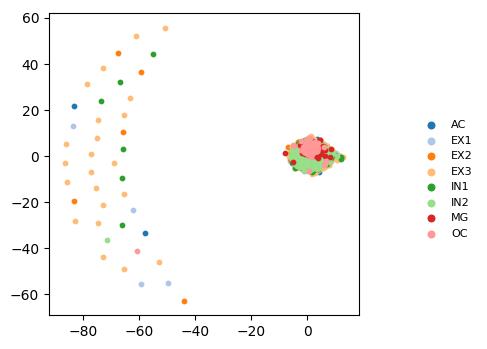

In [5]:
raw_tsne = np.loadtxt('Figure_2a/raw_tsne.txt')
plot_embedding(raw_tsne, celltype)

### PCA

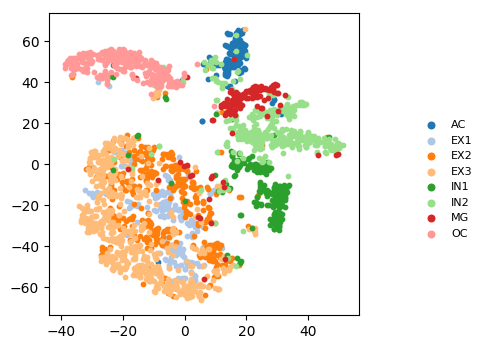

In [6]:
pca_tsne = np.loadtxt('Figure_2a/pca_tsne.txt')
plot_embedding(pca_tsne, celltype)

### scVI

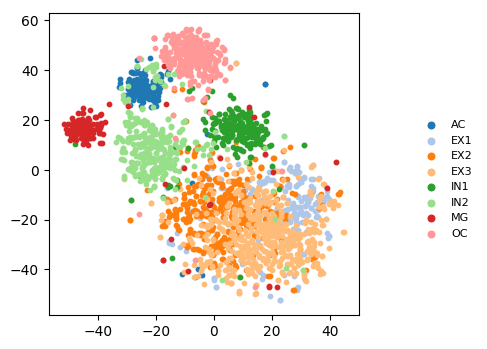

In [7]:
scvi_tsne = np.loadtxt('Figure_2a/scvi_tsne.txt')
plot_embedding(scvi_tsne, celltype)

### SCALE

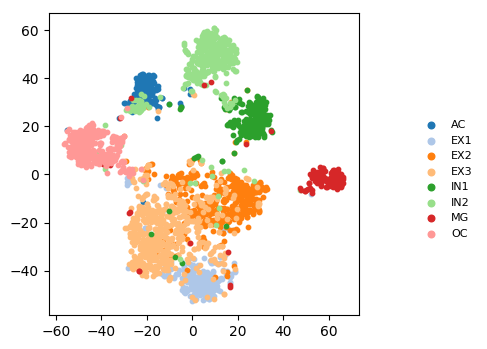

In [8]:
scale_tsne = np.loadtxt('Figure_2a/scale_tsne.txt')
plot_embedding(scale_tsne, celltype)

## Figure_2b

In [9]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score, f1_score
from scale.utils import reassign_cluster_with_ref
from scale.plot import plot_confusion_matrix

scABC ARI: 0.315  NMI: 0.440  F1: 0.514


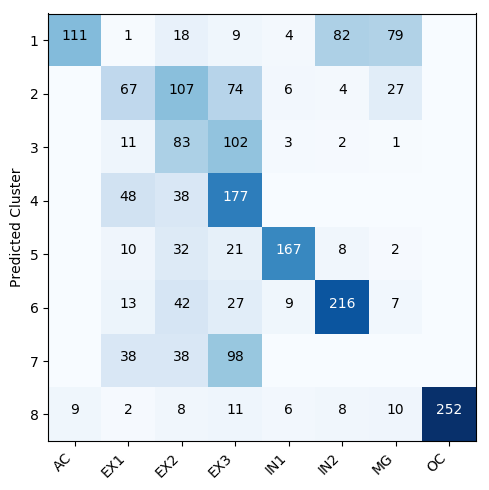

SC3 ARI: -0.005  NMI: 0.026  F1: 0.200


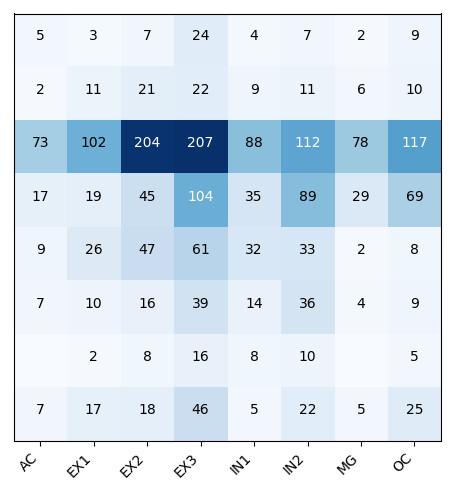

scVI ARI: 0.448  NMI: 0.565  F1: 0.622


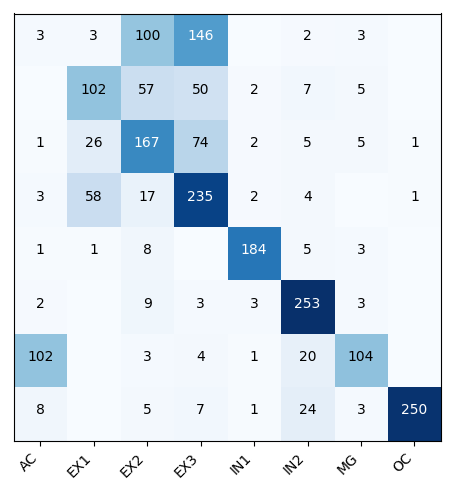

SCALE ARI: 0.668  NMI: 0.730  F1: 0.852


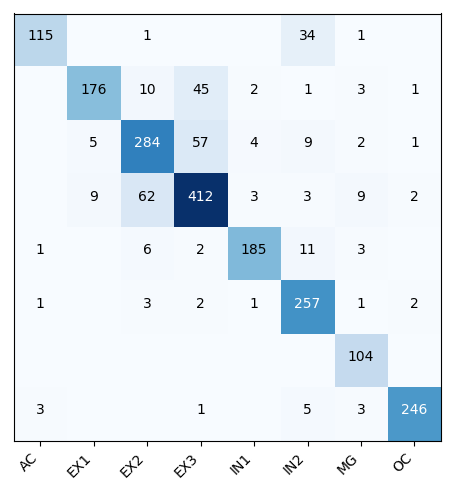

In [10]:
scABC_predict, _ = read_labels('Figure_2b/scABC_predict.txt')
SC3_predict, _ = read_labels('Figure_2b/SC3_predict.txt')
scVI_predict, _ = read_labels('Figure_2b/scVI_predict.txt')
SCALE_predict, _ = read_labels('Figure_2b/SCALE_predict.txt')

show_yticks=True
methods = ['scABC', 'SC3', 'scVI', 'SCALE']
for pred, method in zip([scABC_predict, SC3_predict, scVI_predict, SCALE_predict], methods):
    pred = reassign_cluster_with_ref(pred, ref)
    ari = adjusted_rand_score(ref, pred)
    nmi = normalized_mutual_info_score(ref, pred)
    f1 = f1_score(ref, pred, average='micro')
    print('{} ARI: {:.3f}  NMI: {:.3f}  F1: {:.3f}'.format(method, ari, nmi, f1))
#     print(adjusted_rand_score(ref, pred))
    cm = confusion_matrix(pred, ref)
    plot_confusion_matrix(cm, x_classes=classes, y_classes=range(1,9), show_cbar=False, show_yticks=show_yticks)
    show_yticks=False